In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estimating Age of Abalone
insert intro here

## Import Data
Data was downloaded from https://www.kaggle.com/datasets/devzohaib/estimating-the-age-of-abalone-at-a-seafood-farm.

"sex" - M, F, and I (infant).  
"length" - longest shell measurement.  
"diameter" - perpendicular to the length.  
"height" - measured with meat in the shell.  
"wholewt" - whole abalone weight.  
"shuckedwt" - the weight of abalone meat.  
"viscerawt" - gut-weight.  
"shellwt" - the weight of the dried shell.  
"rings" - number of rings in a shell cross-section.  
"age" - the age of the abalone: the number of rings + 1.5.  
Data description copied from download link.

In [15]:
raw_df = pd.read_csv('abalone.csv')

In [41]:
display(raw_df.head())
raw_df.tail()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,13.5


In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


## Data Cleaning
The was cleaned by checking for null values and outliers.  No null values were found.  Heights equal to zero or greater than 0.4 were removed from the dataset.  Sex was not used as an independent variable since infants appear to be younger and may introduce target leakage.  Rings was dropped from the dataset because age is an explicit function of rings.

In [20]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_wt,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_wt,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_wt,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_wt,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
age,4177.0,11.433684,3.224169,2.5000,9.5000,10.5000,12.500,30.5000


In [21]:
raw_df.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

In [24]:
raw_df.sex = raw_df.sex.astype('category')

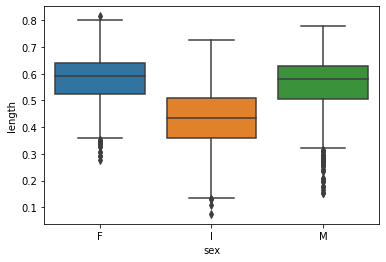

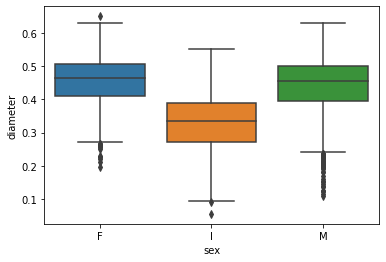

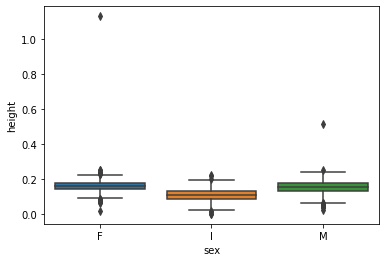

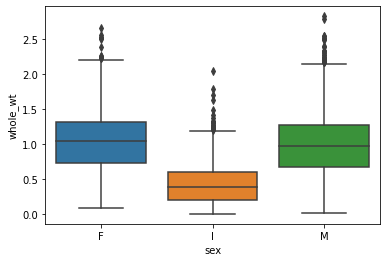

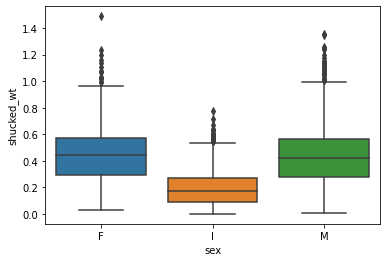

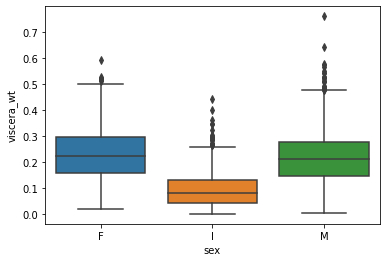

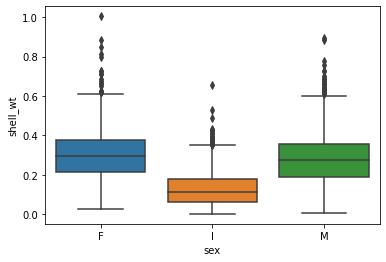

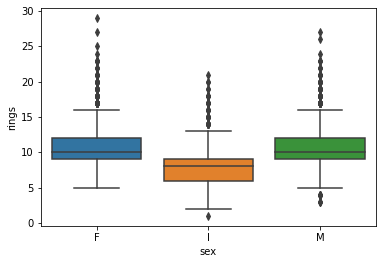

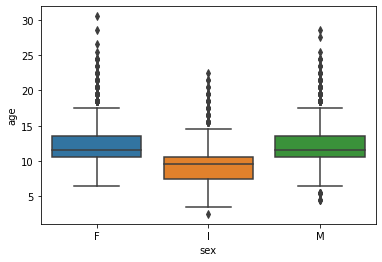

In [28]:
for col in raw_df.columns[1:]:
  sns.boxplot(x=raw_df.sex,y=raw_df[col])
  plt.show()

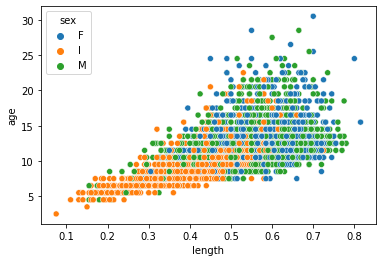

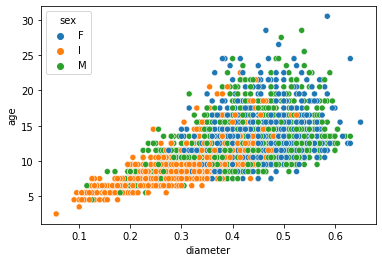

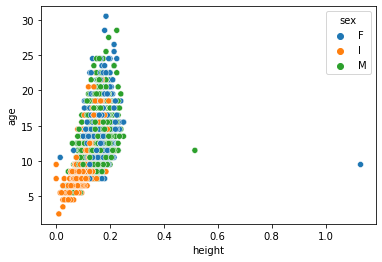

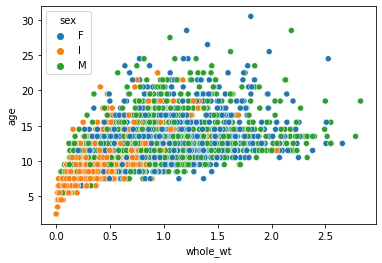

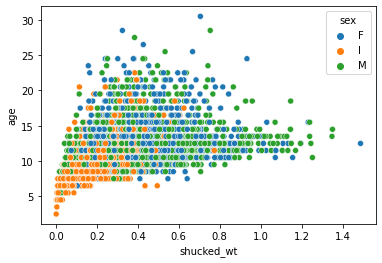

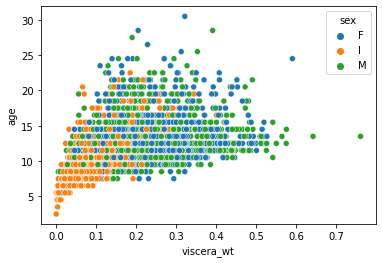

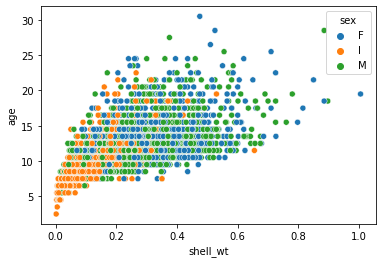

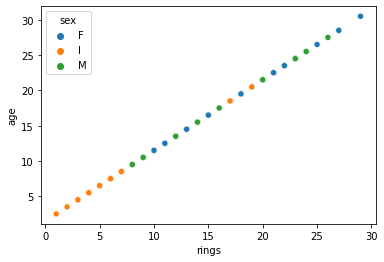

In [31]:
for col in raw_df.columns[1:-1]:
  sns.scatterplot(x=raw_df[col],y=raw_df.age,hue=raw_df.sex)
  plt.show()

In [43]:
df = raw_df.drop(['sex','rings'],axis=1)
df = df[(df.height<0.4) & (df.height > 0)]
df.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


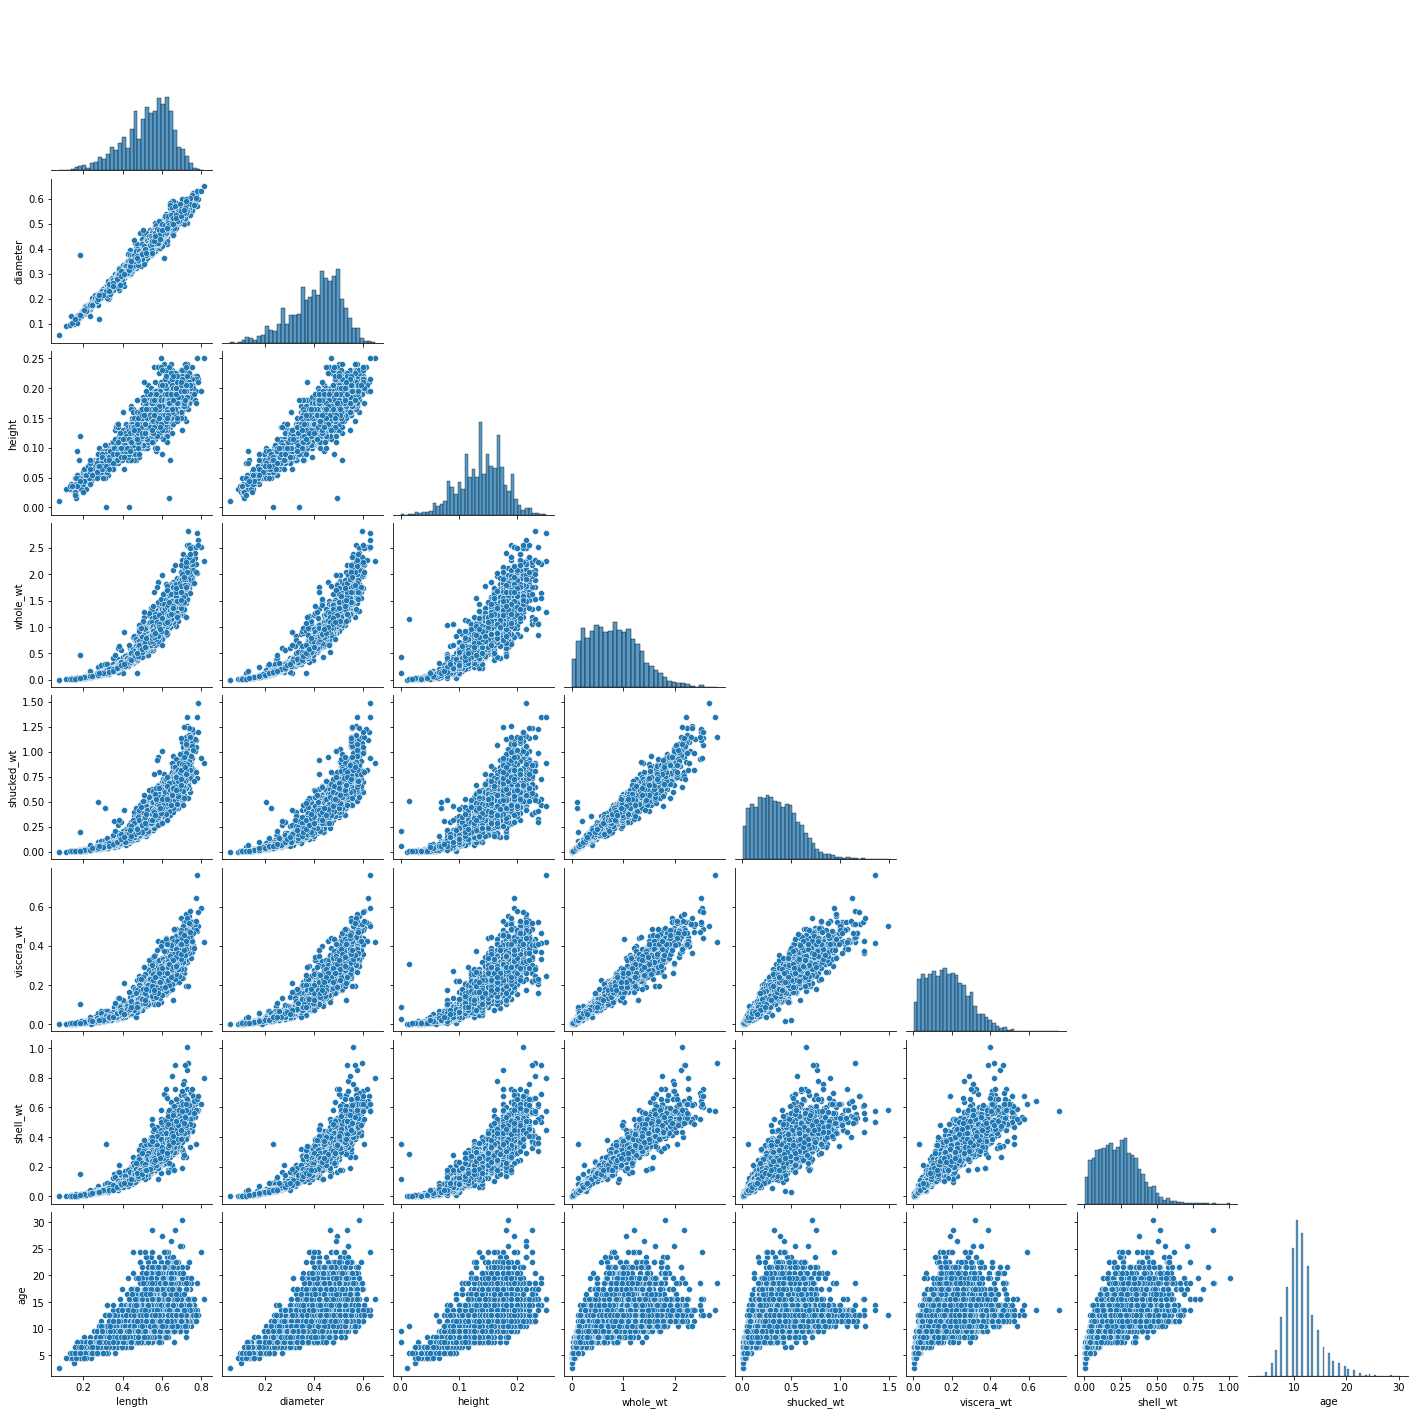

In [38]:
_ = sns.pairplot(df,corner=True)

In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,4173.0,0.524038,0.120061,0.0750,0.4500,0.545,0.6150,0.8150
diameter,4173.0,0.407915,0.099210,0.0550,0.3500,0.425,0.4800,0.6500
height,4173.0,0.139256,0.038378,0.0100,0.1150,0.140,0.1650,0.2500
whole_wt,4173.0,0.828730,0.489987,0.0020,0.4420,0.800,1.1530,2.8255
shucked_wt,4173.0,0.359304,0.221705,0.0010,0.1860,0.336,0.5020,1.4880
viscera_wt,4173.0,0.180595,0.109525,0.0005,0.0935,0.171,0.2530,0.7600
shell_wt,4173.0,0.238794,0.139172,0.0015,0.1300,0.234,0.3285,1.0050
age,4173.0,11.435538,3.224861,2.5000,9.5000,10.500,12.5000,30.5000
